In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import klib as k
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,\
GradientBoostingRegressor,BaggingRegressor,ExtraTreesRegressor,HistGradientBoostingRegressor
from sklearn.svm import LinearSVR

In [2]:
data=pd.read_csv('./Concrete_Data.csv')

In [3]:
data

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [49]:
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
data.isnull().mean()*100

cement              0.0
slag                0.0
flyash              0.0
water               0.0
superplasticizer    0.0
coarseaggregate     0.0
fineaggregate       0.0
age                 0.0
csMPa               0.0
dtype: float64

In [7]:
data.duplicated().sum()

25

In [8]:
data.drop_duplicates(inplace=True)

In [50]:
x=data[['cement']].values
x

array([[540. ],
       [540. ],
       [332.5],
       ...,
       [148.5],
       [159.1],
       [260.9]])

In [51]:
y=data[['csMPa']].values

In [52]:
sc=StandardScaler()

In [53]:
x=sc.fit_transform(x)
x

array([[ 2.50611568],
       [ 2.50611568],
       [ 0.51651597],
       ...,
       [-1.24775558],
       [-1.1461182 ],
       [-0.17001579]])

In [54]:
y

array([[79.99],
       [61.89],
       [40.27],
       ...,
       [23.7 ],
       [32.77],
       [32.4 ]])

In [55]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [56]:
model=LinearRegression()

In [57]:
model.fit(x_train,y_train)

LinearRegression()

In [58]:
model.coef_

array([[7.6997471]])

In [59]:
model.intercept_

array([35.37312332])

In [60]:
trainig_score=model.score(x_train,y_train)*100
trainig_score

22.110936052819596

In [61]:
testing_score=model.score(x_test,y_test)*100
testing_score

30.438964534372325

In [62]:
R2_score=r2_score(y_test,model.predict(x_test))*100
R2_score

30.438964534372325

In [63]:
mae=mean_absolute_error(y_test,model.predict(x_test))
mae

11.3201469471781

In [64]:
mse=mean_squared_error(y_test,model.predict(x_test))
mse

182.4515900467008

In [65]:
y_pred=model.predict(x)
y_pred

array([[54.66958028],
       [54.66958028],
       [39.35016567],
       ...,
       [25.7657209 ],
       [26.54830305],
       [34.06404477]])

In [66]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,79.99,54.669580
1,61.89,54.669580
2,40.27,39.350166
3,41.05,39.350166
4,44.30,29.464529


In [67]:
OUTPUT.tail()

,ACTUAL,PREDICTED
1000,44.28,35.208387
1001,31.18,38.589732
1002,23.70,25.765721
1003,32.77,26.548303
1004,32.40,34.064045


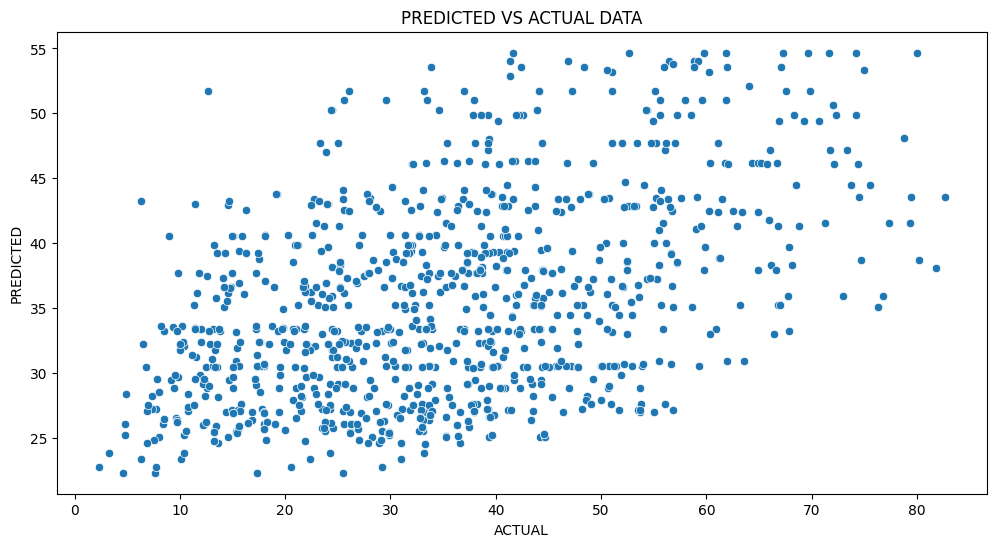

In [68]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL DATA")
plt.xticks()
sns.scatterplot(data=OUTPUT,x ="ACTUAL",y ="PREDICTED");

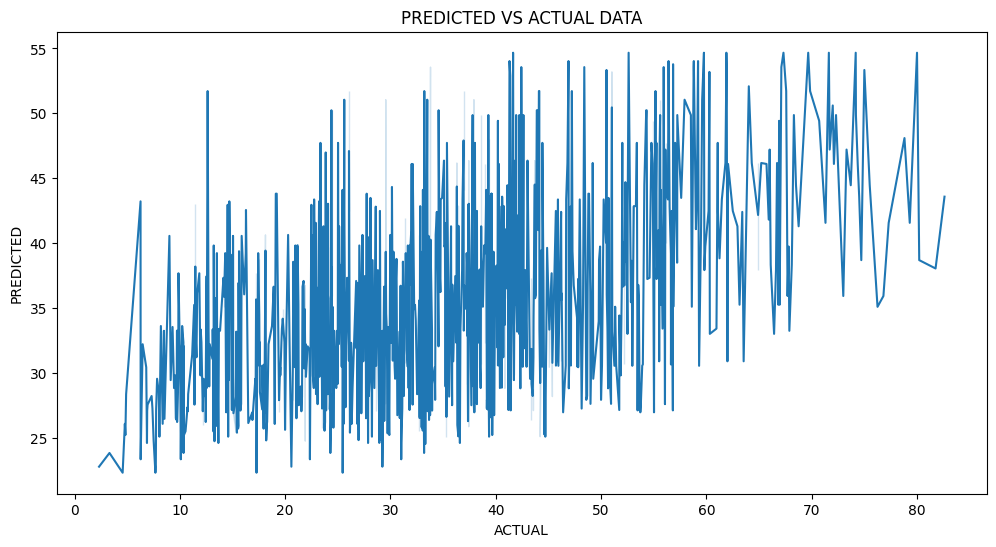

In [69]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL DATA")
sns.lineplot(data=OUTPUT,x="ACTUAL",y="PREDICTED");